In [1]:
import seaborn as sns

# shkarkojme datasetin iris
iris = sns.load_dataset('iris')
iris.head(10)
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [3]:
# per te ndertuar regr e thjeshte linear me duhet
# nje variabel i vazhduar
# variabli x- i cili eshte var i pavarur
# atehere marr gjatesine dh egjeresine  epetales

iris= iris[['petal_length', 'petal_width']]
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


Text(0, 0.5, 'petal_length')

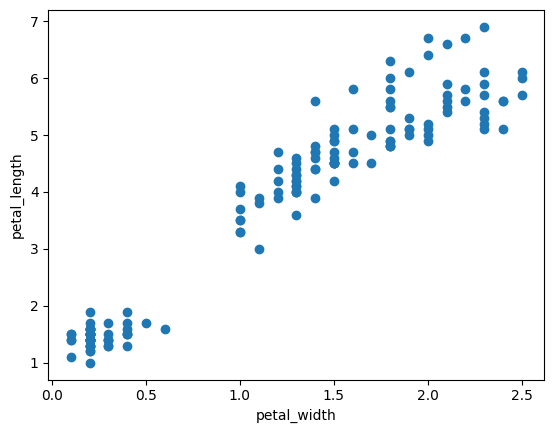

In [4]:
# ndertoj scatter plot per te pare llojin e lidhjes midis dy variable qe zgjodha
import matplotlib.pyplot as plt
x = iris['petal_width']
y = iris['petal_length']
plt.scatter(x,y)
plt.xlabel('petal_width')
plt.ylabel('petal_length')

In [5]:
# hapi1: ndaj te dhenat e mia ne test-train pe rte ndertuar modelin dhe per ta provuar ate
x = iris['petal_width']
y = iris['petal_length']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=19)
x_train

24     0.2
119    1.5
72     1.5
106    1.7
89     1.3
      ... 
52     1.5
19     0.3
98     1.1
110    2.0
93     1.0
Name: petal_width, Length: 120, dtype: float64

In [6]:
x_test.info()

<class 'pandas.core.series.Series'>
Index: 30 entries, 2 to 114
Series name: petal_width
Non-Null Count  Dtype  
--------------  -----  
30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [1]:
import numpy as np
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

x_train


NameError: name 'x_train' is not defined

In [8]:
# therrasim modelin e regresit
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)


LinearRegression()

In [9]:
# therras funsk predict i cili parashikon ne baze te modelit te mesuar me siper
# se sa do te jene vlerat e y
# do te marrim perseri y_train per te vene ne prove mdoelin tim
y_train_predct = linear_model.predict(x_train)
y_train_predct

array([1.51211438, 4.42345503, 4.42345503, 4.87135359, 3.97555647,
       1.73606367, 1.96001295, 1.51211438, 5.09530287, 6.21504927,
       3.75160719, 5.09530287, 3.30370863, 6.43899855, 6.66294783,
       5.31925215, 2.40791151, 6.43899855, 1.51211438, 1.51211438,
       1.73606367, 4.42345503, 4.42345503, 1.51211438, 1.2881651 ,
       6.21504927, 1.51211438, 5.09530287, 1.51211438, 1.51211438,
       5.76715071, 5.09530287, 5.54320143, 1.96001295, 1.51211438,
       5.09530287, 1.51211438, 5.31925215, 4.87135359, 5.31925215,
       1.51211438, 5.09530287, 5.09530287, 6.21504927, 6.66294783,
       1.51211438, 1.96001295, 3.97555647, 4.19950575, 6.21504927,
       1.51211438, 1.73606367, 5.54320143, 3.97555647, 3.30370863,
       1.96001295, 1.96001295, 3.97555647, 5.76715071, 5.09530287,
       5.99109999, 1.96001295, 4.19950575, 5.76715071, 1.51211438,
       6.21504927, 3.30370863, 5.09530287, 1.51211438, 5.99109999,
       5.54320143, 4.19950575, 4.42345503, 1.51211438, 6.21504

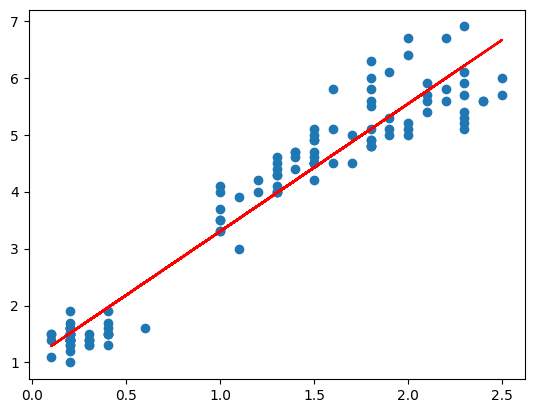

In [12]:
# grafiku i vlerave reale
plt.scatter(x_train, y_train)
# grafiku i vlerave te parashikuara
plt.plot(x_train, y_train_predct, color = 'red')


In [13]:
# nga grafiku me siper jam e kenaqur me modelin tim
# shoh keofiecentin i cili me tregon en shifra sa i sakte eshte modeli

r_sq = linear_model.score(x_train, y_train)
r_sq

0.9319828454400454

In [14]:
# le te shohim modelin per te dhenat test
y_test_predct = linear_model.predict(x_test)

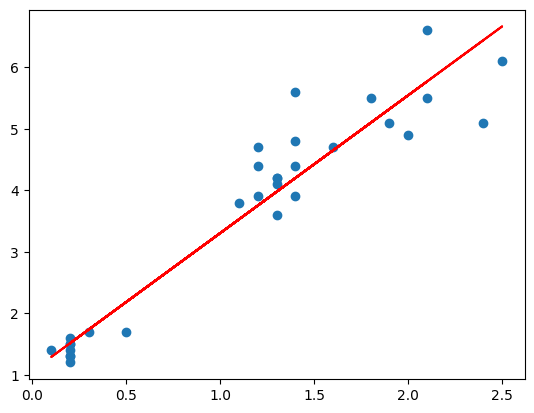

In [15]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_predct, color = 'red')

In [16]:
r_sq = linear_model.score(x_test, y_test)
r_sq

0.9048377085150454

In [17]:
# gjej keofientet e drejts se regr
b1 = linear_model.coef_
b0= linear_model.intercept_
print(b1)
print(b0)

[2.2394928]
1.0642158249034734


In [19]:
y_pred_test = b0 + b1*x_test

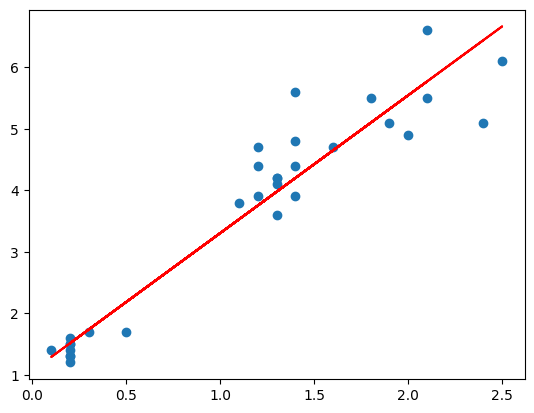

In [20]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color = 'red')